In [33]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
import numpy as np
import seaborn as sns

%matplotlib inline

In [34]:
load_dotenv('ALPACA.ENV')

True

In [35]:
#User Watchlist 
user_sofi = 1
user_amzn = 1 
user_uber = 1 
user_aapl = 1
user_amd = 1
user_nvda = 1 

In [36]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca_end_point = os.getenv("ALPACA_END_POINT")



alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2",
    base_url = alpaca_end_point)

In [37]:
start_date = pd.Timestamp("2015-05-03", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-05-03", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AAPL", "AMZN"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"


# Get current closing prices for SPY and AGG
df_portfolio_8_year = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

df_portfolio_8_year.head

<bound method NDFrame.head of                               open    high     low   close     volume  \
timestamp                                                               
2015-12-01 05:00:00+00:00  118.750  118.81  116.86  117.34   34852374   
2015-12-02 05:00:00+00:00  117.050  118.11  116.08  116.28   33385643   
2015-12-03 05:00:00+00:00  116.550  116.79  114.22  115.20   41560785   
2015-12-04 05:00:00+00:00  115.290  119.25  115.11  119.03   57776977   
2015-12-07 05:00:00+00:00  118.980  119.86  117.81  118.28   32080754   
...                            ...     ...     ...     ...        ...   
2023-04-27 04:00:00+00:00  108.160  110.86  106.80  109.82  149980181   
2023-04-28 04:00:00+00:00  107.730  109.48  104.33  105.45  129523349   
2023-05-01 04:00:00+00:00  104.950  105.23  101.82  102.05   74957069   
2023-05-02 04:00:00+00:00  101.470  103.90  101.15  103.63   73480816   
2023-05-03 04:00:00+00:00  103.735  105.96  103.28  103.65   63420786   

                    

In [38]:
# Separate ticker data
AAPL = df_portfolio_8_year[df_portfolio_8_year['symbol']=='AAPL'].drop('symbol', axis=1)
AMZN = df_portfolio_8_year[df_portfolio_8_year['symbol']=='AMZN'].drop('symbol', axis=1)




# Concatenate the ticker DataFrames
df_portfolio_8_year = pd.concat([AAPL,AMZN], axis=1, keys=["AAPL","AMZN"])

# Display sample data
df_portfolio_8_year.head()

AAPL                                    \
                             open    high     low   close    volume   
timestamp                                                             
2015-12-01 05:00:00+00:00  118.75  118.81  116.86  117.34  34852374   
2015-12-02 05:00:00+00:00  117.05  118.11  116.08  116.28  33385643   
2015-12-03 05:00:00+00:00  116.55  116.79  114.22  115.20  41560785   
2015-12-04 05:00:00+00:00  115.29  119.25  115.11  119.03  57776977   
2015-12-07 05:00:00+00:00  118.98  119.86  117.81  118.28  32080754   

                                                     AMZN                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2015-12-01 05:00:00+00:00      187129  117.756760  673.75  681.000  667.86   
2015-12-02 05:00:00+00:00      180616  117.151198  681.00  684.820  674.25   
2015-12-03 05:00:00+00:00      245330  115.434888  679.06  682.790  661.48   
2015-12-04 05:00:00+00:00      307788  118.187290  666.00  674.775  661.40   
2015-12-07 05:00:00+00:00      190809  118.509111  674.74  675.460  660.50   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2015-12-01 05:00:00+00:00  679.06  4751152       58734  675.745114  
2015-12-02 05:00:00+00:00  676.01  4273526       53343  679.940598  
2015-12-03 05:00:00+00:00  666.25  5064736       63933  671.538292  
2015-12-04 05:00:00+00:00  672.64  4534796       55448  669.995283  
2015-12-07 05:00:00+00:00  669.83  3732814       46236  667.025599

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='timestamp'>

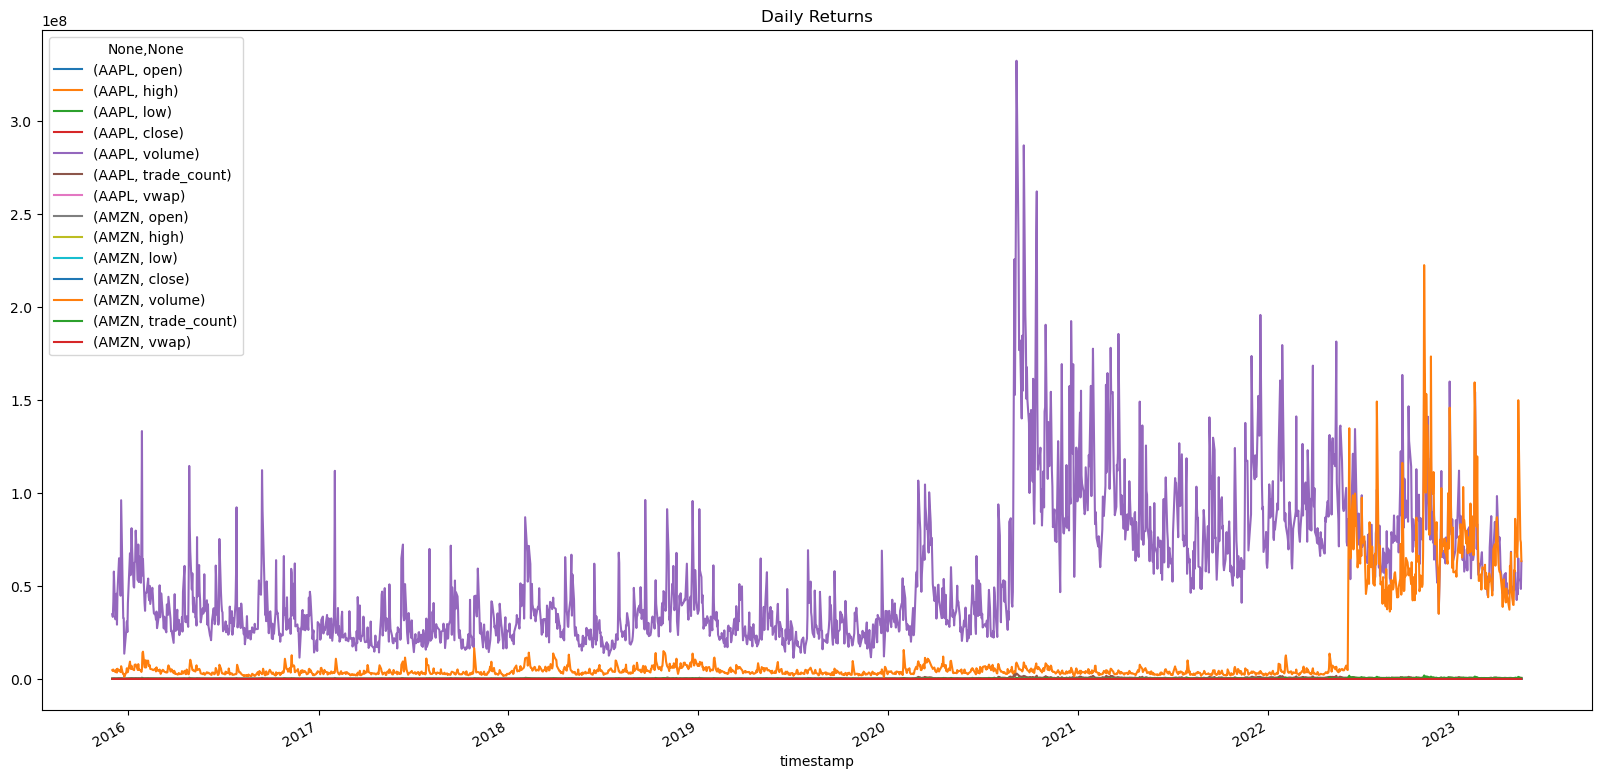

In [39]:
df_portfolio_8_year.plot( title="Daily Returns" , figsize=(20,10))

<AxesSubplot:title={'center':'Portfolio Risk'}>

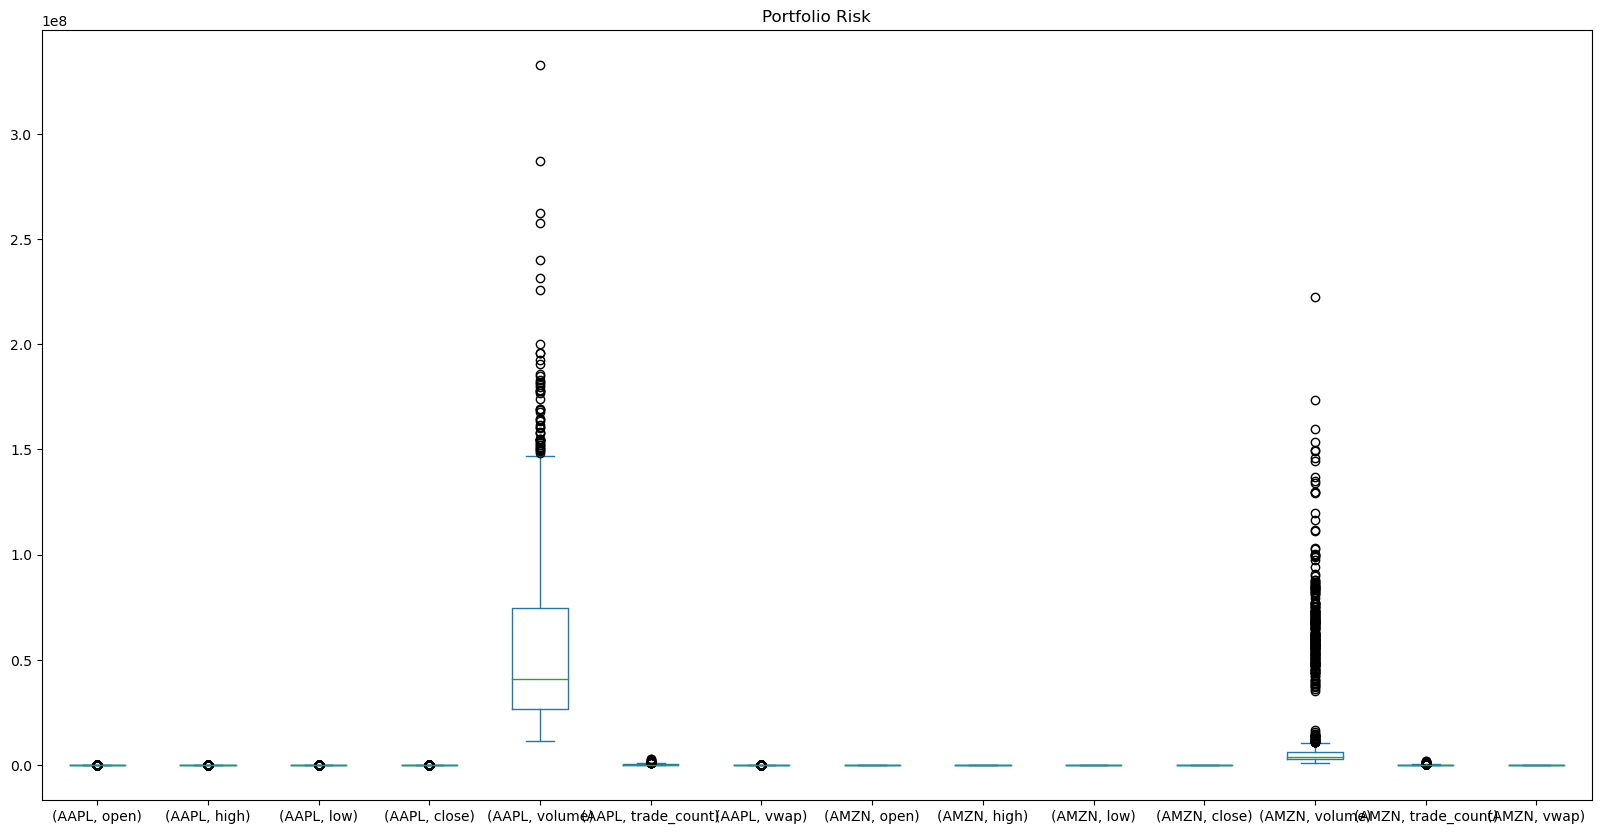

In [40]:
df_portfolio_8_year.plot.box(title= "Portfolio Risk", figsize=(20,10))

In [41]:
daily_std = df_portfolio_8_year.std().sort_values(ascending=False)
daily_std

AAPL  volume         3.713250e+07
AMZN  volume         2.337607e+07
AAPL  trade_count    3.014045e+05
AMZN  trade_count    1.874319e+05
      high           1.095307e+03
      open           1.082550e+03
      close          1.082531e+03
      vwap           1.081692e+03
      low            1.069292e+03
AAPL  high           6.659582e+01
      close          6.500468e+01
      vwap           6.494024e+01
      open           6.477099e+01
      low            6.404285e+01
dtype: float64

In [42]:
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

AAPL  volume         5.894602e+08
AMZN  volume         3.710837e+08
AAPL  trade_count    4.784648e+06
AMZN  trade_count    2.975390e+06
      high           1.738746e+04
      open           1.718495e+04
      close          1.718465e+04
      vwap           1.717133e+04
      low            1.697448e+04
AAPL  high           1.057176e+03
      close          1.031917e+03
      vwap           1.030894e+03
      open           1.028208e+03
      low            1.016649e+03
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='timestamp'>

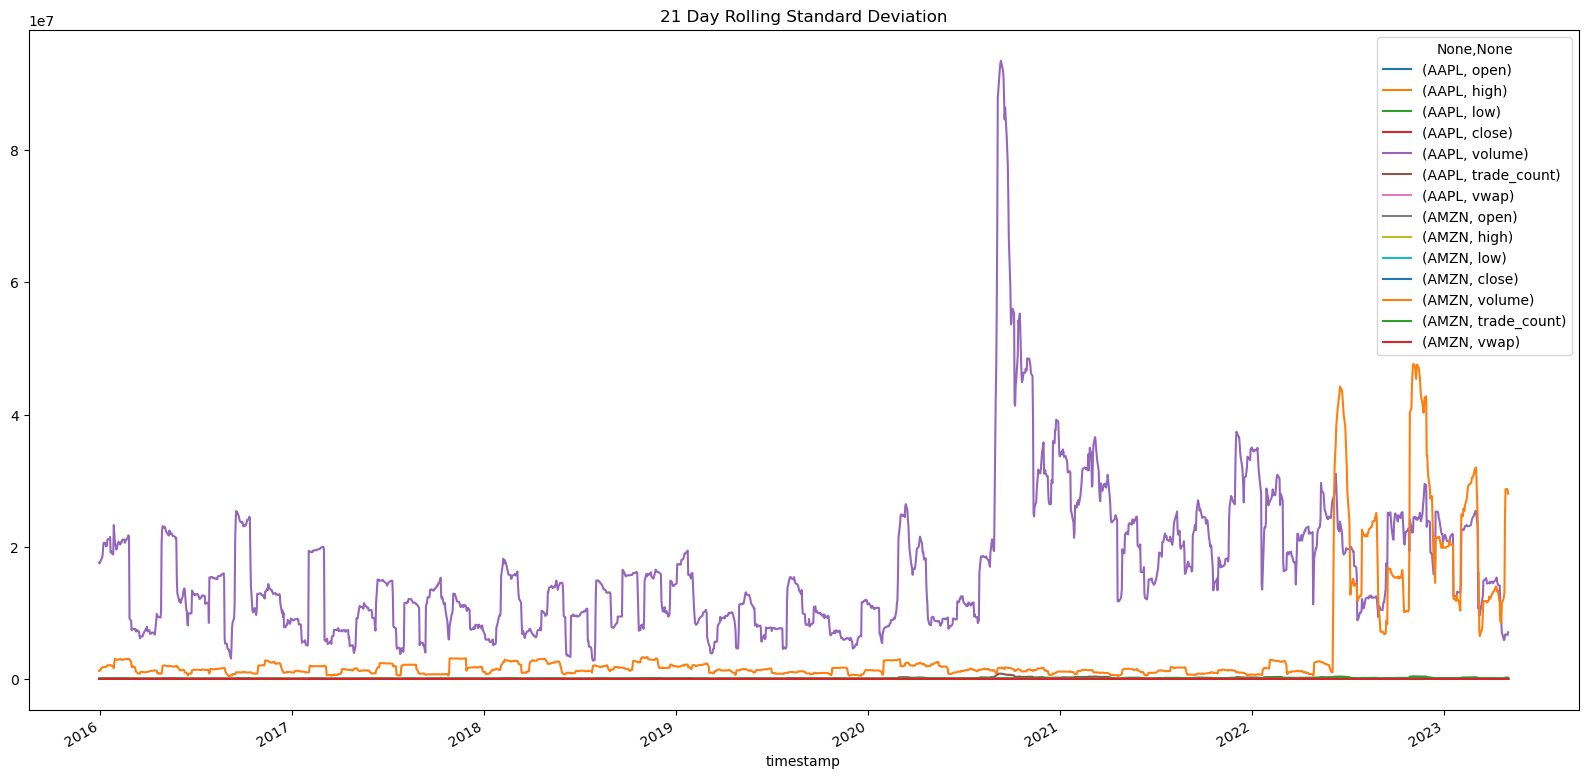

In [43]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
df_portfolio_8_year.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

In [44]:
correlation = df_portfolio_8_year.corr()
correlation

AAPL                                          \
                      open      high       low     close    volume   
AAPL open         1.000000  0.984390  0.999521  0.999074 -0.243732   
     high         0.984390  1.000000  0.982890  0.982982 -0.236898   
     low          0.999521  0.982890  1.000000  0.999544 -0.253690   
     close        0.999074  0.982982  0.999544  1.000000 -0.244903   
     volume      -0.243732 -0.236898 -0.253690 -0.244903  1.000000   
     trade_count -0.064543 -0.059551 -0.076023 -0.066717  0.943197   
     vwap         0.999611  0.984873  0.999773  0.999724 -0.245094   
AMZN open         0.277362  0.271582  0.275311  0.276260  0.388590   
     high         0.278270  0.272675  0.276282  0.277432  0.391306   
     low          0.277630  0.268713  0.276072  0.276992  0.383388   
     close        0.278683  0.269958  0.277131  0.278375  0.386676   
     volume      -0.111293 -0.108042 -0.113729 -0.110378  0.250055   
     trade_count -0.029092 -0.026064 -0.035067 -0.029673  0.474606   
     vwap         0.278209  0.272480  0.276414  0.277502  0.386848   

                                            AMZN                      \
                 trade_count      vwap      open      high       low   
AAPL open          -0.064543  0.999611  0.277362  0.278270  0.277630   
     high          -0.059551  0.984873  0.271582  0.272675  0.268713   
     low           -0.076023  0.999773  0.275311  0.276282  0.276072   
     close         -0.066717  0.999724  0.276260  0.277432  0.276992   
     volume         0.943197 -0.245094  0.388590  0.391306  0.383388   
     trade_count    1.000000 -0.066689  0.400626  0.403902  0.394732   
     vwap          -0.066689  1.000000  0.276636  0.277727  0.277131   
AMZN open           0.400626  0.276636  1.000000  0.999810  0.999403   
     high           0.403902  0.277727  0.999810  1.000000  0.999353   
     low            0.394732  0.277131  0.999403  0.999353  1.000000   
     close          0.398517  0.278327  0.999174  0.999427  0.999784   
     volume         0.283897 -0.110899 -0.502629 -0.501416 -0.503147   
     trade_count    0.533772 -0.029633 -0.208509 -0.205476 -0.212228   
     vwap           0.398645  0.277750  0.999781  0.999905  0.999561   

                                                            
                     close    volume trade_count      vwap  
AAPL open         0.278683 -0.111293   -0.029092  0.278209  
     high         0.269958 -0.108042   -0.026064  0.272480  
     low          0.277131 -0.113729   -0.035067  0.276414  
     close        0.278375 -0.110378   -0.029673  0.277502  
     volume       0.386676  0.250055    0.474606  0.386848  
     trade_count  0.398517  0.283897    0.533772  0.398645  
     vwap         0.278327 -0.110899   -0.029633  0.277750  
AMZN open         0.999174 -0.502629   -0.208509  0.999781  
     high         0.999427 -0.501416   -0.205476  0.999905  
     low          0.999784 -0.503147   -0.212228  0.999561  
     close        1.000000 -0.502072   -0.208998  0.999553  
     volume      -0.502072  1.000000    0.904775 -0.502846  
     trade_count -0.208998  0.904775    1.000000 -0.209466  
     vwap         0.999553 -0.502846   -0.209466  1.000000

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

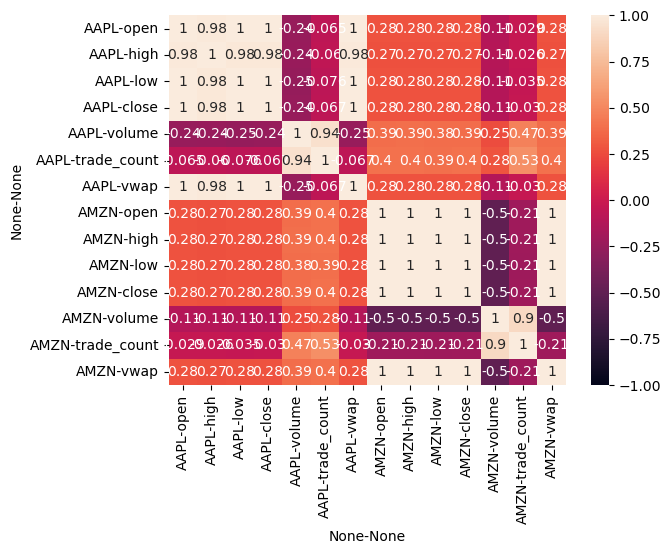

In [45]:
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

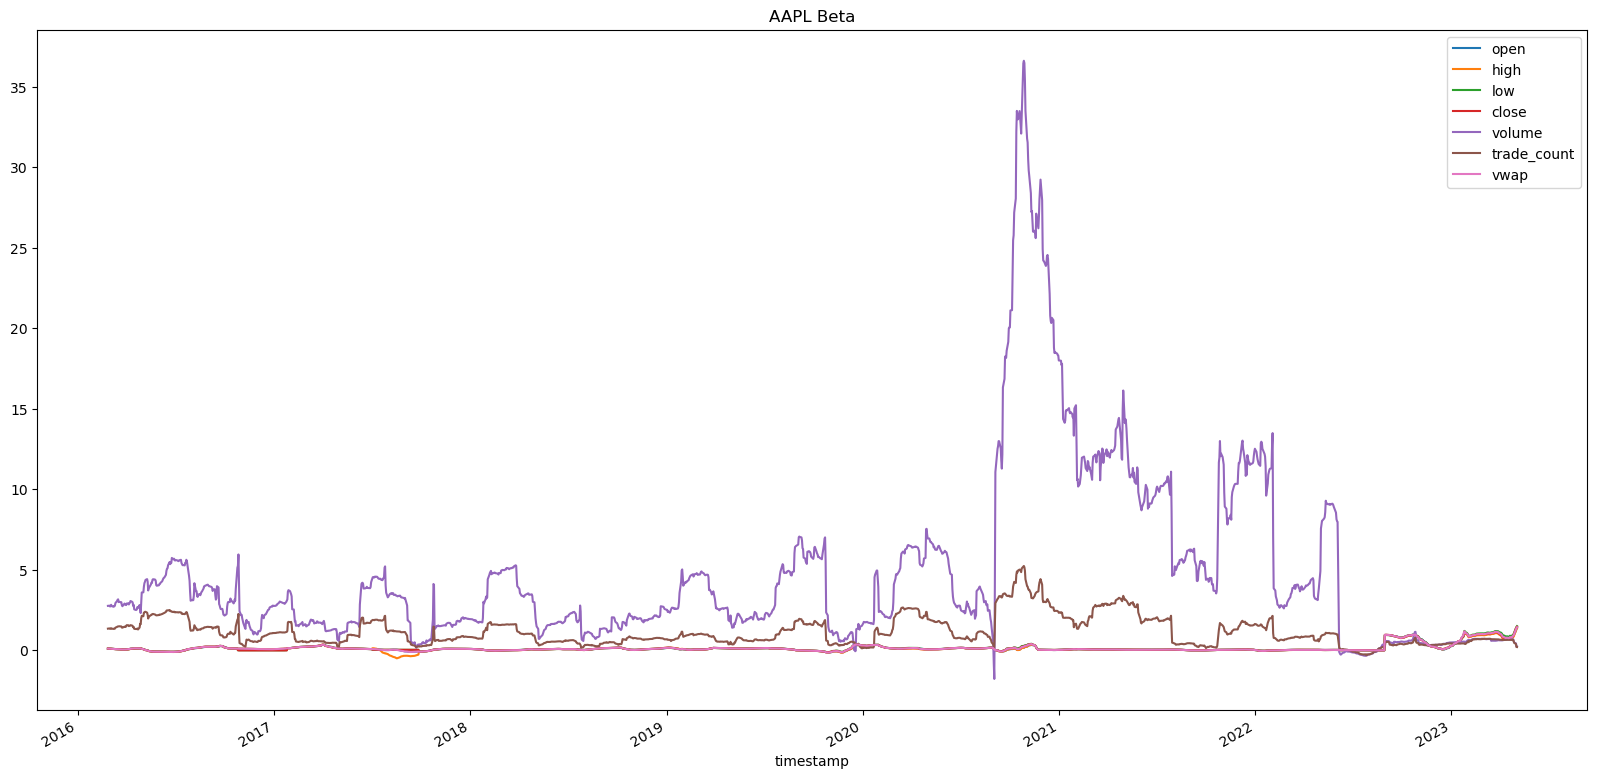

In [46]:
# Calculate covariance of a single portfolio
AAPL_covariance = df_portfolio_8_year['AAPL'].rolling(window=60).cov(df_portfolio_8_year['AMZN'])
AAPL_covariance
# Calculate variance of S&P 500
variance = df_portfolio_8_year['AMZN'].rolling(window=60).var()
variance
# Computing beta
# Plot beta trend
AAPL_beta = AAPL_covariance / variance
AAPL_beta_plot = AAPL_beta.plot(title="AAPL Beta", figsize=(20, 10))

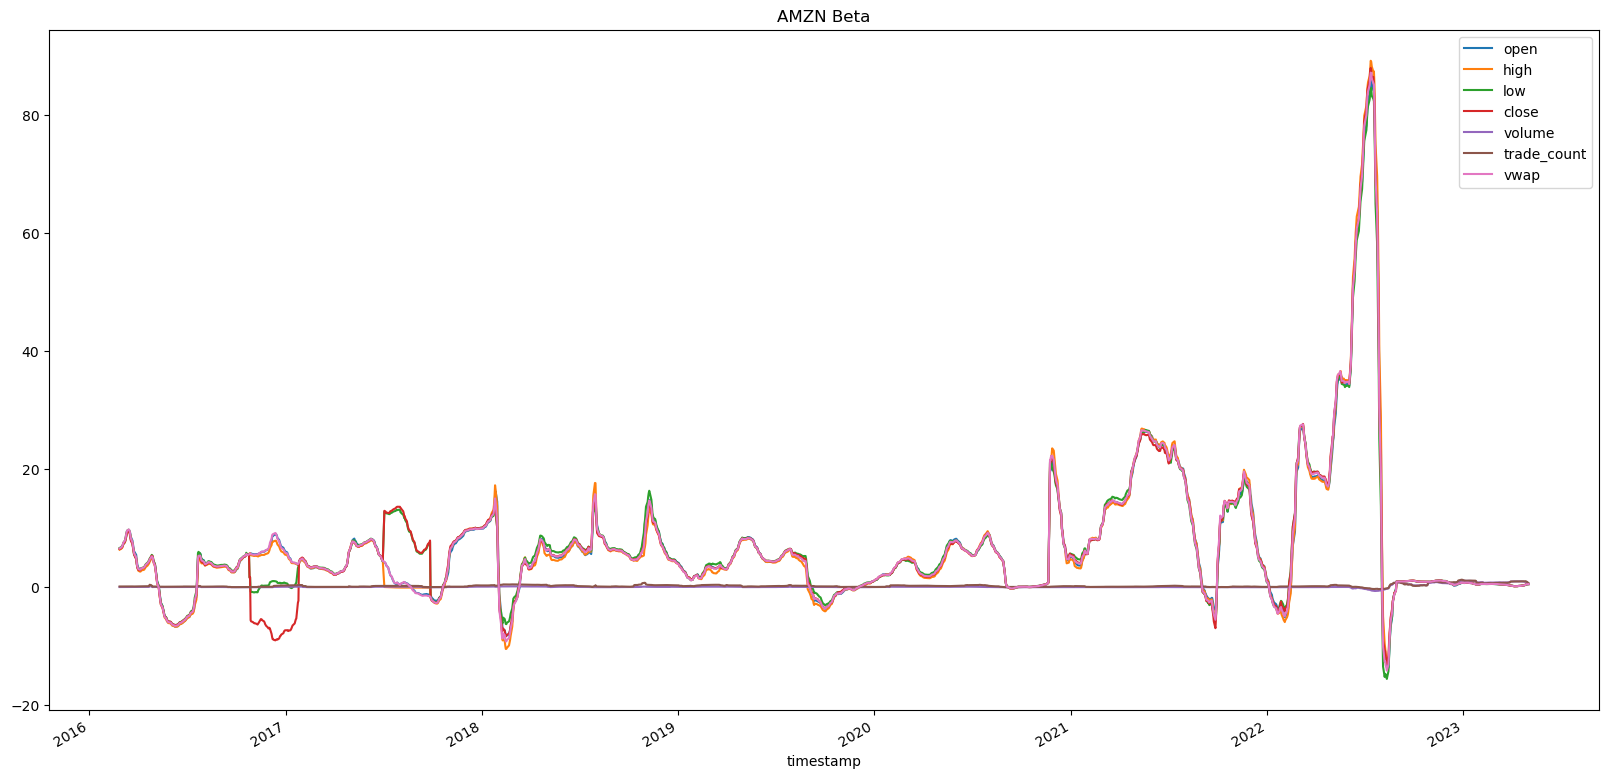

In [47]:
# Calculate covariance of a single portfolio
AMZN_covariance = df_portfolio_8_year['AMZN'].rolling(window=60).cov(df_portfolio_8_year['AAPL'])
AMZN_covariance
# Calculate variance of S&P 500
variance = df_portfolio_8_year['AAPL'].rolling(window=60).var()
variance
# Computing beta
# Plot beta trend
AMZN_beta = AMZN_covariance / variance
AMZN_beta_plot = AMZN_beta.plot(title="AMZN Beta", figsize=(20, 10))

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='timestamp'>

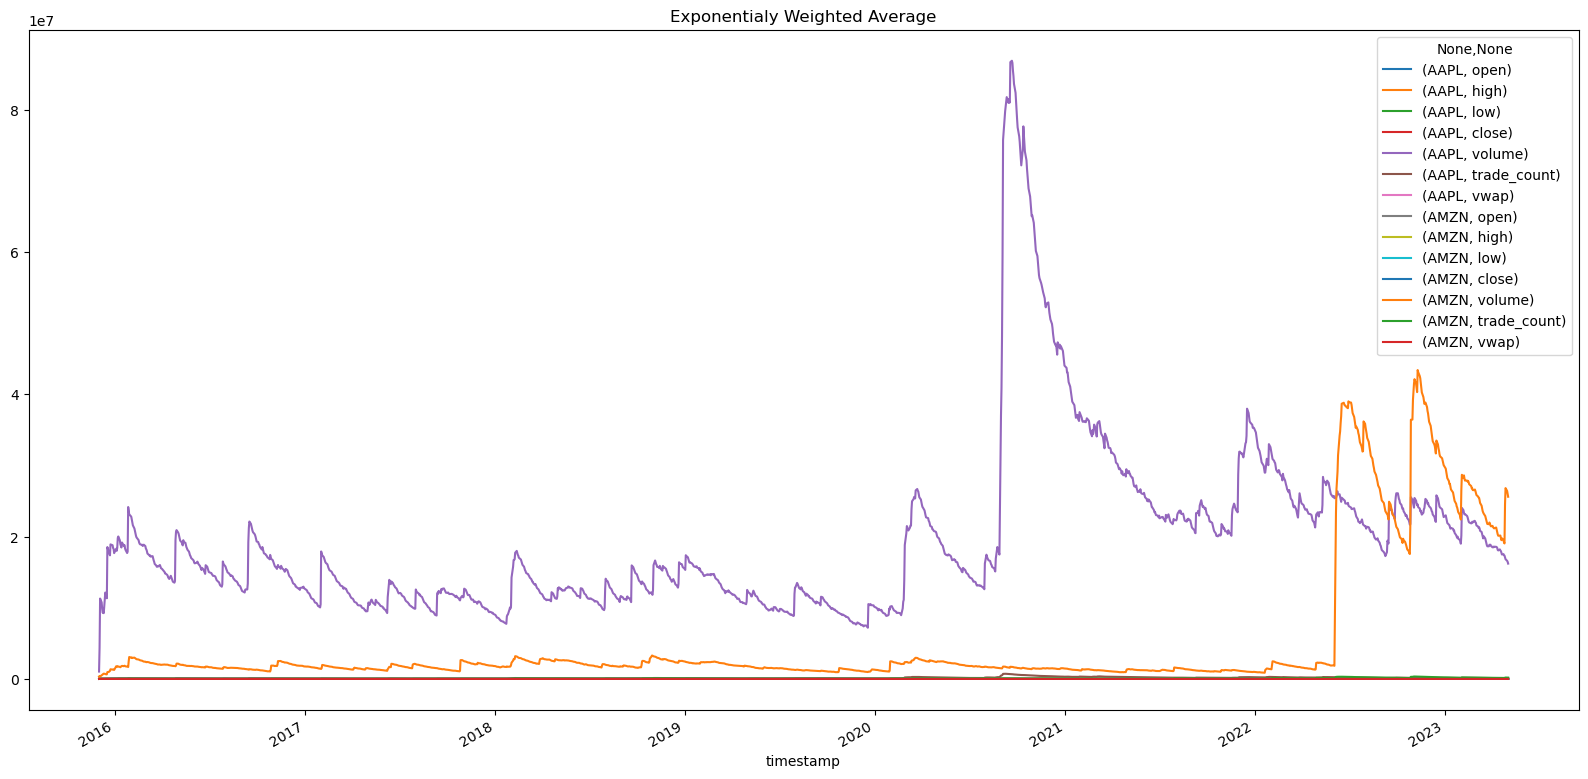

In [49]:
rolling_window_ewma = df_portfolio_8_year.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewma

In [50]:
# Annualized Sharpe Ratios
sharpe_ratios = (df_portfolio_8_year.mean() * 252) / (df_portfolio_8_year.std() * np.sqrt(252))
sharpe_ratios

AAPL  open           41.870915
      high           41.235604
      low            41.919119
      close          41.763124
      volume         23.282219
      trade_count    21.355553
      vwap           41.801939
AMZN  open           24.735679
      high           24.713258
      low            24.716919
      close          24.705462
      volume          8.300467
      trade_count    15.608095
      vwap           24.742946
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

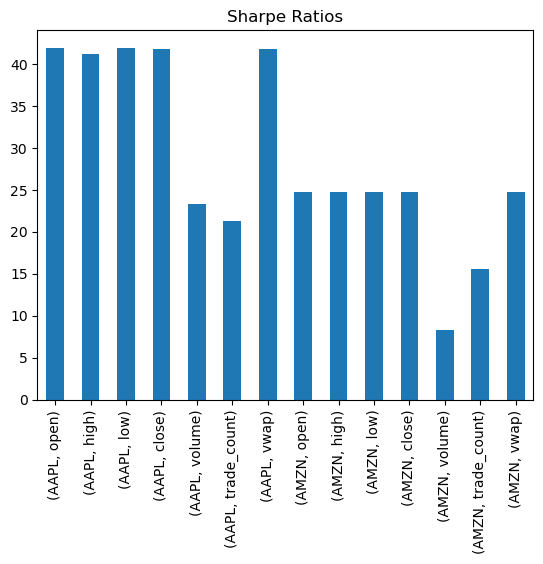

In [51]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")